## Assignment 4

- **Name** - Tejas Liladhar Kolhe
- **PRN** - 230940128016

## 1. Import Statements

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## 2. Setup Global Parameters

In [5]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 23 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10001  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = 'coolwarm'

## 3. Generate Data Set
<div style="font-family: Arial; font-size:1.2em;color:white;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [6]:
data = pd.read_csv('fifa_2019.csv')

In [7]:
data

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

In [8]:
for col in data.columns:
    print(f'{col}: {data[col].unique()}')

Unnamed: 0: [    0     1     2 ... 18204 18205 18206]
ID: [158023  20801 190871 ... 241638 246268 246269]
Name: ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
Age: [31 33 26 27 32 25 29 28 24 30 19 40 22 23 34 35 36 37 21 18 20 39 41 17
 38 45 42 16 44]
Photo: ['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']
Nationality: ['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' 'Switze

In [9]:
data = data[data['Position'].notnull()]
data.shape

(18147, 89)

In [10]:
#data.columns

In [11]:
rel_columns = ['Position','Finishing','HeadingAccuracy','ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [12]:
data = data[rel_columns]
data.head()

Position  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0       RF       95.0             70.0          90.0     86.0       97.0   
1       ST       94.0             89.0          81.0     87.0       88.0   
2       LW       87.0             62.0          84.0     84.0       96.0   
3       GK       13.0             21.0          50.0     13.0       18.0   
4      RCM       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  BallControl  ...  Penalties  Composure  \
0   93.0        94.0         87.0         96.0  ...       75.0       96.0   
1   81.0        76.0         77.0         94.0  ...       85.0       95.0   
2   88.0        87.0         78.0         95.0  ...       81.0       94.0   
3   21.0        19.0         51.0         42.0  ...       40.0       68.0   
4   85.0        83.0         91.0         91.0  ...       79.0       88.0   

   Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0     33.0            28.0           26.0       6.0        11.0       15.0   
1     28.0            31.0           23.0       7.0        11.0       15.0   
2     27.0            24.0           33.0       9.0         9.0       15.0   
3     15.0            21.0           13.0      90.0        85.0       87.0   
4     68.0            58.0           51.0      15.0        13.0        5.0   

   GKPositioning  GKReflexes  
0           14.0         8.0  
1           14.0        11.0  
2           15.0        11.0  
3           88.0        94.0  
4           10.0        13.0  

[5 rows x 34 columns]

In [13]:
#checking the null values
#data.isna().sum()

In [14]:
data.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [15]:
# Define the position code for goalkeepers
goalkeeper = 'GK'

# Define the position codes for various forward positions
forward = ['ST', 'LW', 'RW', 'LF', 'RF', 'RS', 'LS', 'CF']

# Define the position codes for midfielders
midfielders = ['CM', 'RCM', 'LCM', 'CDM', 'RDM', 'LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']

# Define the position codes for defenders
defence = ['CB', 'RCB', 'LCB', 'LWB', 'RWB', 'LB', 'RB']


In [16]:
# Update 'Position' values for goalkeepers to 0
data.loc[data['Position'] == 'GK', 'Position'] = 0

# Update 'Position' values for defenders to 1
data.loc[data['Position'].isin(defence), 'Position'] = 1

# Update 'Position' values for midfielders to 2
data.loc[data['Position'].isin(midfielders), 'Position'] = 2

# Update 'Position' values for forwards to 3
data.loc[data['Position'].isin(forward), 'Position'] = 3

# Convert the 'Position' column to numeric values
data['Position'] = pd.to_numeric(data['Position'], downcast='integer')


In [17]:
labels = {0:'Goal Keeper',1:"Defence",2:"Mid-fielders",3:"Forward"}

In [18]:
X = data.drop('Position',axis =1)
y = data['Position']
X.shape,y.shape

((18147, 33), (18147,))

In [19]:
y = pd.get_dummies(y)
y.shape

(18147, 4)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,
                                                 stratify=y,random_state=RANDOM_STATE)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14517, 33), (3630, 33), (14517, 4), (3630, 4))

### Scaling

In [21]:
# Importing the StandardScaler class from scikit-learn
scaler = StandardScaler()

# Scaling the features in the training set
X_train = scaler.fit_transform(X_train)  # train

# Scaling the features in the testing set
X_test = scaler.transform(X_test)  # test

# Converting the target variable in the training set to a NumPy array
y_train = y_train.to_numpy()  # array

# Converting the target variable in the testing set to a NumPy array
y_test = y_test.to_numpy()  # convert to array


In [22]:
y_train

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

### Softmax Function

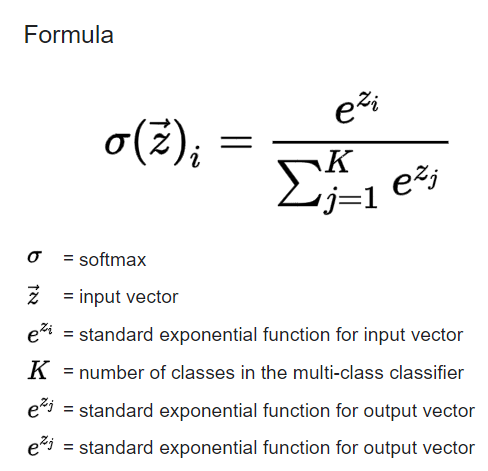

In [23]:
def fn_softmax(z):
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [24]:
fn_softmax(np.array([[-np.inf, 0, np.inf],[-5,2,5]])).sum(axis = 1)

<ipython-input-23-02683e3a40c4>:3: RuntimeWarning: invalid value encountered in divide
  return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


array([nan,  1.])

### Tanh Activation Function

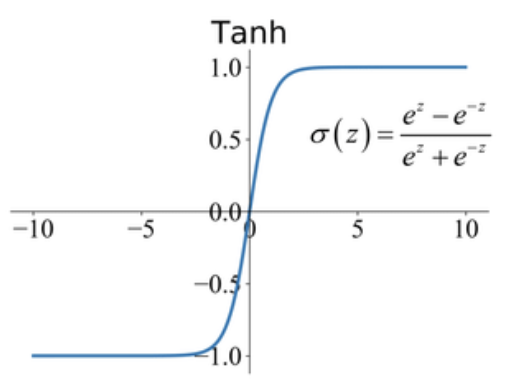

In [25]:
def fn_actv(z):
    return np.tanh(z)
def fn_actv_prime(a):
    return 1- np.tanh(a)**2

In [26]:
fn_actv(np.array([[-1,0,1],[-np.inf,0,np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [27]:
np.tanh(0.5)

0.46211715726000974

In [28]:
fn_actv_prime(0.5)

0.7864477329659274

## 5. Prediction

In [29]:
# a function to make prediction
def predict(model,X):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']

    #### Forward Propagation
    ## Layer 1
    z1=X.dot(W1)+b1  #Aggregation Fn
    a1=fn_actv(z1)   #Activation Fn

    ## Layer 2
    z2=a1.dot(W2)+b2  #Aggregation Fn
    a2=fn_softmax(z2)    #Activation Fn

    return np.argmax(a2,axis =1)


**Its advisable to test the function**

In [30]:
def calculate_loss(model,X,y):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    m=X.shape[0]
    #### Forward Propagation
    ## Layer 1
    z1=X.dot(W1)+b1  #Aggregation Fn
    a1=fn_actv(z1)   #Activation Fn

    ## Layer 2
    z2=a1.dot(W2)+b2  #Aggregation Fn
    a2=fn_softmax(z2)    #Activation Fn

    data_loss=-(y*np.log(a2)+(1-y)*np.log(1-a2)).sum()

    return 1./m * data_loss

<div style="font-family: Arial; font-size:1.2em;">
    <h3>Back-propagation - Estimate Perceptron weights </h3>
    $
\begin{aligned}
\partial{z}  & = a - y \\
\partial{b}  & = \partial{z} \\
\partial{w_1}  & = x_1 \circ \partial{z}\\
\partial{w_2}  & = x_2 \circ \partial{z}\\
\end{aligned}
$
    <hr>
      $
\begin{aligned}
b & = b -  \frac{1}{m} (\alpha \circ \partial{b}) \\
w_1  & = w_1 - \frac{1}{m}(\alpha \circ \partial{w_1} )\\
w_2  & = w_2 - \frac{1}{m}(\alpha \circ \partial{w_2} )\\
\end{aligned}
$
    </div>
    


 ## 6. Training

In [31]:
# function to train the model
def build_model(nn_hdim : np.int64,
                X : np.ndarray,
                y :np.ndarray,
                X_ts : np.ndarray,
                y_ts :np.ndarray,
                epochs : np.ndarray = EPOCHS,
                alpha :np.float64 = ALPHA) -> dict:

    W1=np.random.rand(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    W2=np.random.rand(nn_hdim,nn_output_dim)/np.sqrt(nn_hdim)

    b1=np.zeros((1,nn_hdim))
    b2=np.zeros((1,nn_output_dim))

    curr_loss=0
    loss,epoch=[],[]
    t_loss = []
    acc= [],
    t_acc = []

    m=X.shape[0]

    for i in range(epochs):

        #### Forward Propagation
        ## Layer 1
        z1=X.dot(W1)+b1  #Aggregation Fn
        a1=fn_actv(z1)   #Activation Fn

        ## Layer 2
        z2=a1.dot(W2)+b2  #Aggregation Fn
        a2=fn_softmax(z2)    #Activation Fn

        #### Back Propagation
        dz2=a2-y
        assert(z2.shape==dz2.shape),f'error z2 {z2.shape}/{dz2.shape}'

        dW2=a1.T.dot(dz2)
        assert(W2.shape==dW2.shape),f'error W2 {W2.shape}/{dW2.shape}'

        db2=np.sum(dz2,axis=0,keepdims=True)
        assert(b2.shape==db2.shape),f'error b2 {b2.shape}/{db2.shape}'

        da1=dz2.dot(W2.T)

        #Layer 1
        dz1=da1*fn_actv_prime(z1)

        dW1=(X.T).dot(dz1)
        assert(W1.shape==dW1.shape),f'error W1 {W1.shape}/{dW1.shape}'

        db1=np.sum(dz1,axis=0,keepdims=True)
        assert(b1.shape==db1.shape),f'error b1 {b1.shape}/{db1.shape}'

        W1+= -alpha*dW1/m    #Gradient update
        W2+= -alpha*dW2/m    #Gradient update
        b1+= -alpha*db1/m    #Gradient update
        b2+= -alpha*db2/m    #Gradient update

        model ={'W1':W1,'b1':b1,'W2':W2,'b2':b2}

        if i % 100:
            # loss on Train data
            curr_loss = calculate_loss(model, X, y)
            loss.append(curr_loss)

            # loss on Test data
            curr_loss = calculate_loss(model, X_ts, y_ts)
            t_loss.append(curr_loss)

            epoch.append(i)

        if i % 1000 == 0:
            print(f'epoch:{i}; current_loss={curr_loss:.4f}')


    loss_hist['epoch']=epoch
    loss_hist['loss']=loss
    loss_hist['t_loss']=t_loss


    return model

In [32]:
num_example,nn_input_dim = X_train.shape # training set size (rows and col)
nn_output_dim = y_train.shape[1]  # Output Layer dimentionality

loss_hist = {}

In [33]:
model = build_model(18,X_train,y_train,X_test,y_test)

epoch:0; current_loss=0.0000
epoch:1000; current_loss=0.5823
epoch:2000; current_loss=0.5608
epoch:3000; current_loss=0.5517
epoch:4000; current_loss=0.5479
epoch:5000; current_loss=0.5468
epoch:6000; current_loss=0.5473
epoch:7000; current_loss=0.5488
epoch:8000; current_loss=0.5507
epoch:9000; current_loss=0.5528
epoch:10000; current_loss=0.5548


In [34]:
model

{'W1': array([[ 4.30011277e-02,  5.13209784e-01,  5.65957987e-01,
          1.07882857e-01, -4.71039041e-01,  2.23058050e-02,
         -1.71587731e-01, -4.08556664e-01,  4.17842559e-01,
          2.26220566e-02, -6.68942429e-01,  7.46137569e-02,
          5.38452140e-01, -2.65543131e-01, -3.17734524e-01,
          3.84902957e-01, -3.88779522e-02,  3.77836908e-01],
        [ 1.93805667e-01, -1.99121792e-01,  3.72839000e-01,
         -7.10154256e-02, -1.32616508e-01, -1.30393654e-02,
         -4.22244777e-01,  3.38280868e-02, -5.13684939e-01,
          1.74942217e-01, -1.84130826e-01, -2.87695776e-01,
          2.00505625e-01, -1.71582535e-01, -3.34048427e-03,
          2.42509479e-01, -6.08378771e-01, -3.14841128e-01],
        [ 7.90962322e-02,  4.89265125e-01,  1.41287939e-01,
          1.46605340e-01,  1.31731562e-01, -1.01593216e-01,
          2.68521413e-01,  2.51374681e-01, -2.38644583e-02,
         -4.78569991e-01,  2.13750406e-01, -4.59744208e-02,
          5.84938663e-01,  1.137

In [35]:
loss_df = pd.DataFrame(loss_hist)

In [36]:
loss_df.head()

epoch      loss    t_loss
0      1  2.078508  2.087395
1      2  2.048563  2.059113
2      3  2.025221  2.037045
3      4  2.005957  2.018752
4      5  1.989189  2.002720


##### This code generates a side-by-side comparison of the training and testing errors (losses) over epochs for a machine learning mode

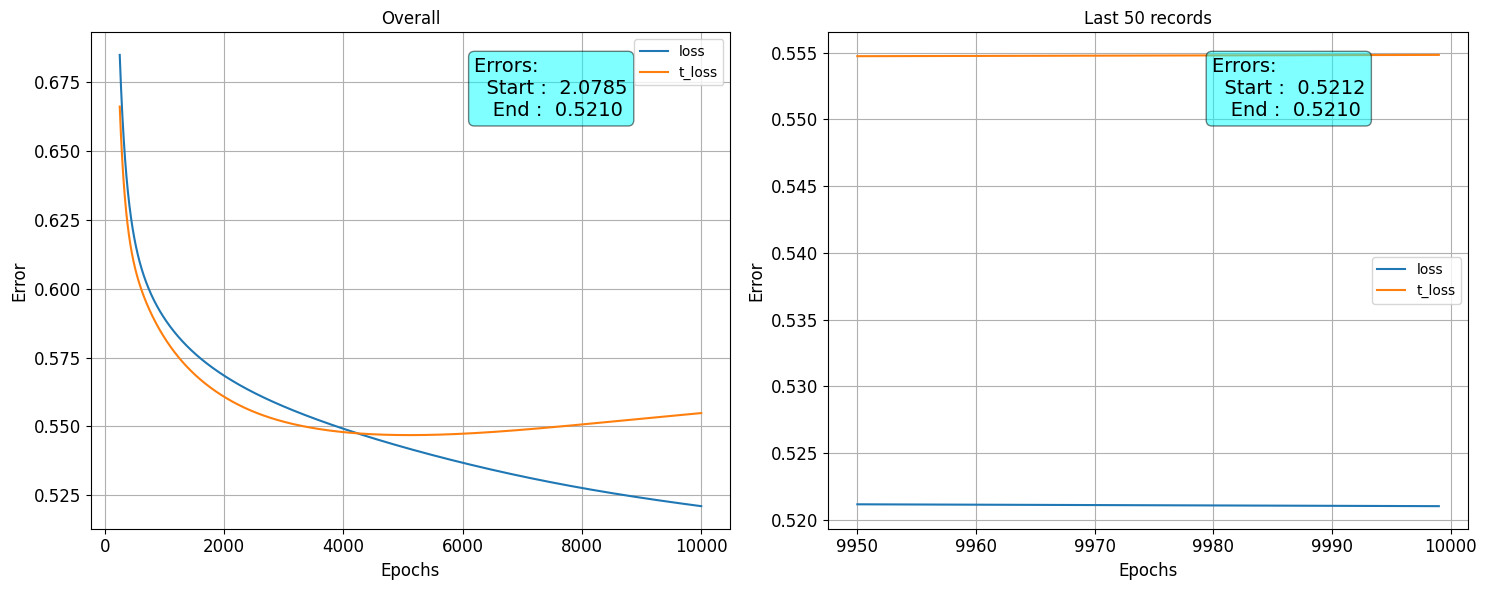

In [37]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 50

ax = axes[0]

loss_df[250:].plot(x = 'epoch', y = ['loss', 't_loss'], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# properties  matplotlib.patch.Patch
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();

ax = axes[1]

loss_df[-l_range:].plot(x = 'epoch', y = ['loss', 't_loss'], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[-l_range]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Last {} records'.format(l_range))
ax.grid();
plt.tight_layout()

In [38]:
loss_df[loss_df['t_loss'] == loss_df['t_loss'].min()]

epoch      loss   t_loss
5058   5110  0.541844  0.54684

## 7. Predictions

### Train Set

In [39]:
y_pred = predict(model, X_train)
y_pred.shape

(14517,)

In [40]:
print('Accuracy score on Train Data :', accuracy_score(np.argmax(y_train, axis = 1), y_pred))

Accuracy score on Train Data : 0.8901976992491561


In [41]:
print(classification_report(np.argmax(y_train,axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       0.93      0.93      0.93      4693
           2       0.84      0.88      0.86      5470
           3       0.86      0.78      0.82      2734

    accuracy                           0.89     14517
   macro avg       0.91      0.90      0.90     14517
weighted avg       0.89      0.89      0.89     14517



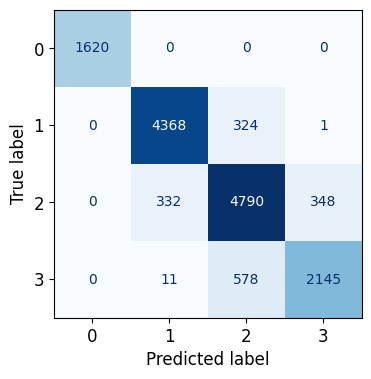

In [42]:
cm  = confusion_matrix(np.argmax(y_train,axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              #display_labels=labels.values()
                             )

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False)

plt.show();

### Test Set

In [43]:
y_pred = predict(model, X_test)

print('Accuracy score on Test Data :', accuracy_score(np.argmax(y_test,axis=1), y_pred))

Accuracy score on Test Data : 0.8848484848484849


In [44]:
print(classification_report(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.92      0.93      0.93      1173
           2       0.84      0.87      0.85      1368
           3       0.86      0.77      0.81       684

    accuracy                           0.88      3630
   macro avg       0.90      0.89      0.90      3630
weighted avg       0.88      0.88      0.88      3630



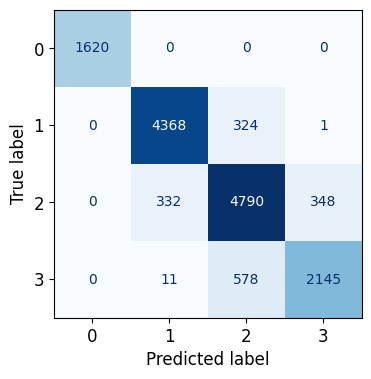

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              #display_labels=labels.values()
                             )

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False)

plt.show();

## Tracking
<div style="font-family: Arial; font-size:1.2em;color:black;">
Lets track the results across various implementations...

 |#|Implementation|Training Accuracy|Testing Accuracy|Remarks|
 |:-:|---|---|---|---|
 |1|Simple Perceptron|0.83111|0.89000||